<a href="https://colab.research.google.com/github/amit-chaubey/model-comparison/blob/main/ml_model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing important modules and libraries for data preproccessing, data visualisation, model training, testing metrics and saving the model for transfer learning.

In [ ]:
# For computation and creating the dataframe
import pandas as pd
import numpy as np
import random

# For preprocessing the data and creating the pipeline for the data
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# For training-testing split
from sklearn.model_selection import train_test_split

# For model evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, ConfusionMatrixDisplay, confusion_matrix, silhouette_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# For handling imbalanced data
from imblearn.over_sampling import RandomOverSampler

# For PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# For handling additional issue
import warnings
from sklearn.exceptions import FitFailedWarning

# For saving model
from google.colab import files

###Loading the dataset, provide the path for the dataset.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/stars_data.csv') # Load the data

#First look at the dataset(EDA)
###1.Head
###2.Column
###3.Tail
###4.Spectral class count
###5.Star type count
###6.Basic info
###7.Checking if any null value exist

In [ ]:
df.head(10)  # have a look at the data frame

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
5,2840,0.000650,0.1100,16.98,0,Red,M
6,2637,0.000730,0.1270,17.22,0,Red,M
7,2600,0.000400,0.0960,17.40,0,Red,M
8,2650,0.000690,0.1100,17.45,0,Red,M
9,2700,0.000180,0.1300,16.05,0,Red,M


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


###Print the name of the column

In [ ]:
print(f'-------Name of the Columns-------\n {df.columns}')  # Print the name of the columns

-------Name of the Columns-------
 Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')


In [ ]:
df.tail(5) # Have a look at the tail of the data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
235,38940,374830.0,1356.0,-9.93,5,Blue,O
236,30839,834042.0,1194.0,-10.63,5,Blue,O
237,8829,537493.0,1423.0,-10.73,5,White,A
238,9235,404940.0,1112.0,-11.23,5,White,A
239,37882,294903.0,1783.0,-7.80,5,Blue,O


In [ ]:
df['Spectral Class'].value_counts() # Spectral class count

,count
Spectral Class,
M,111
B,46
O,40
A,19
F,17
K,6
G,1


In [ ]:
df['Star type'].value_counts() # Star type count

,count
Star type,
0,40
1,40
2,40
3,40
4,40
5,40


In [ ]:
df.isnull().sum()  # Checking if any null value exit

,0
Temperature (K),0
Luminosity(L/Lo),0
Radius(R/Ro),0
Absolute magnitude(Mv),0
Star type,0
Star color,0
Spectral Class,0


#Plot the correlation analysis to understand the correlation of features.

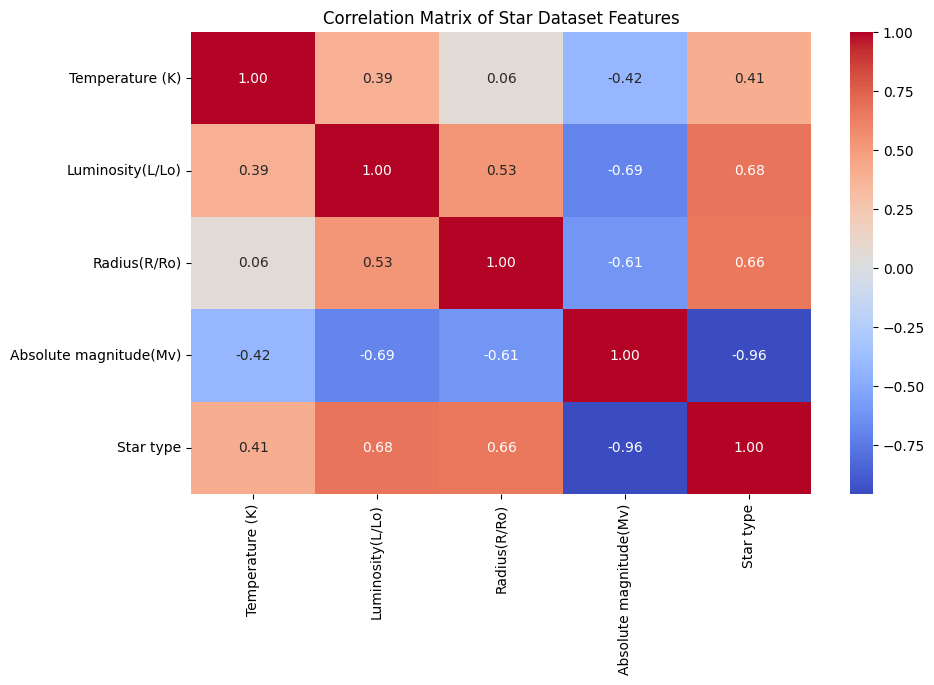

In [ ]:
# Drop the target column 'Spectral Class' for correlation analysis
stars_data_no_target = df.drop(['Spectral Class', 'Star color'], axis=1)

# Compute the correlation matrix
correlation_matrix = stars_data_no_target.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Star Dataset Features')
plt.show()

#Remove noise from the feature

In [ ]:
# The following line of code processes the 'Star color' column in the DataFrame:
# 1. Replaces hyphens ('-') with spaces (' ') to ensure consistency in color names.
# 2. Converts all text to lowercase for uniformity.
# 3. Removes any leading and trailing whitespace to clean the data.
df['Star color'] = df['Star color'].str.replace('-', ' ').str.lower().str.strip()

# This line calculates and displays the relative frequency (proportion) of each unique value in the 'Star color' column.
# The 'normalize=True' parameter ensures the value counts are displayed as proportions rather than absolute counts.
df['Star color'].value_counts(normalize=True)

,proportion
Star color,
red,0.466667
blue,0.233333
blue white,0.170833
white,0.041667
yellow white,0.033333
yellowish white,0.012500
yellowish,0.012500
whitish,0.008333
orange,0.008333


###Plot Distribution and Histogram of Target Variable w.r.t features.

In [ ]:
def plot_star_features(df, column):
    """
    Generates visualizations to analyze the distribution of a specified categorical column
    and its relationship with numerical features in a star dataset.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the star dataset.
    column (str): The name of the categorical column to analyze (e.g., "Star color" or "Spectral class").

    Returns:
    None: Displays a pie chart and box plots.
    """
    # Count the occurrences of each category for the pie chart
    category_counts = df[column].value_counts().reset_index()
    category_counts.columns = [column, 'count']

    # Custom color palette for the pie chart
    colors = px.colors.qualitative.Pastel1 + px.colors.qualitative.Set2

    # Pie chart of the specified category with a custom color palette
    fig_pie = px.pie(category_counts, values='count', names=column, hole=0.4, opacity=0.6,
                     title=f'Distribution of {column.replace("_", " ").title()}', color_discrete_sequence=colors)
    fig_pie.update_traces(textposition='outside', textinfo='percent+label')
    fig_pie.update_layout(height=600, width=1000)  # Adjust size to match histograms
    fig_pie.show()

    # List of numerical features to plot against the specified category
    features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type']

    # Determine the number of rows needed for the subplot, assuming 2 columns
    cols = 2
    rows = len(features) // cols + int(len(features) % cols > 0)

    # Create subplots
    fig_box = make_subplots(rows=rows, cols=cols, subplot_titles=[f'{feature} vs {column.replace("_", " ").title()}' for feature in features])

    # Generate box plots for each feature and add them to the subplots
    for i, feature in enumerate(features):
        row = i // cols + 1
        col = i % cols + 1
        fig_box.add_trace(
            go.Box(x=df[column], y=df[feature], name=feature, boxmean=True),
            row=row, col=col
        )

    fig_box.update_layout(height=400 * rows, width=1000, title_text=f'Box Plots of Features vs {column.replace("_", " ").title()}')
    fig_box.show()

# Call the function to generate visualizations for the specified column
plot_star_features(df, "Star color")
plot_star_features(df, "Spectral Class")


###Plot pairplot w.r.t hue as Target Variable

Number of unique spectral classes: 7


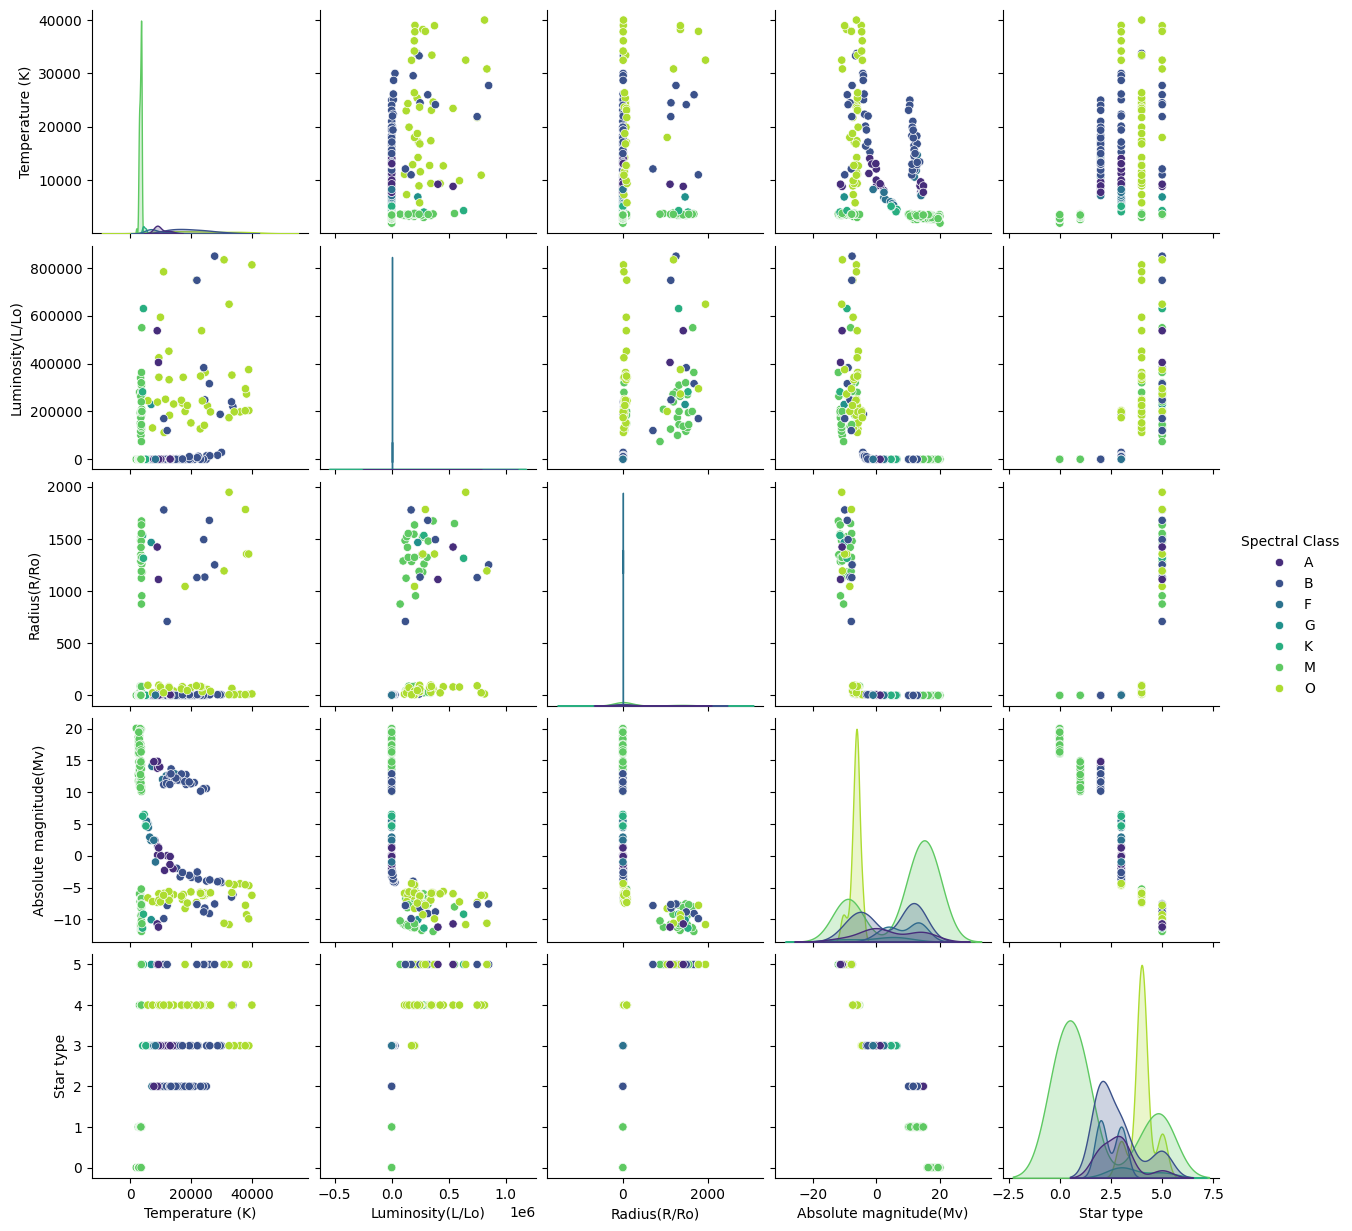

In [ ]:
# Ensure 'Spectral Class' is categorical
df['Spectral Class'] = df['Spectral Class'].astype('category')

# Select numeric columns and include 'Spectral Class'
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cols_to_plot = numeric_cols + ['Spectral Class']

# Determine the number of unique categories in 'Spectral Class'
num_categories = df['Spectral Class'].nunique()
print(f"Number of unique spectral classes: {num_categories}")

# Generate a palette with enough colors
palette = sns.color_palette('viridis', n_colors=num_categories)

# Create a pairplot with the custom palette
sns.pairplot(df[cols_to_plot], palette=palette, hue='Spectral Class')

# Display the plot
plt.show()


##PreProcessing the data involves few calls:
###1.Numeric Features - Needs scalling
###2.Categorical Features - Needs to be Encoded (depends on the algorithm used)
###3.Ordinal Features - Passthrough
###4.Target Features - Needs to be Encoded (depends on the algorithm used)

##Therefore
###1. Encode
###2. Apply
###3. Display

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.model_selection import train_test_split

# Define the feature columns and the target column
numeric_features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
categorical_features = ['Star color']
ordinal_features = ['Star type']  # Since 'Star type' is numerical, we'll handle it appropriately
target_feature = 'Spectral Class'

# Encode the target variable
label_encoder = LabelEncoder()
df[target_feature] = label_encoder.fit_transform(df[target_feature])

# Since 'Star type' is already numeric, include it in numeric_features
numeric_features.append('Star type')
ordinal_features = []  # No longer needed

# Setup preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(sparse_output=False), categorical_features)
    ]
)

# Apply preprocessing
X = df.drop([target_feature], axis=1)  # Features only
y = df[target_feature]  # Target variable

X_processed = preprocessor.fit_transform(X)

# Get feature names for numerical and categorical features
num_features_transformed = numeric_features  # MinMaxScaler doesn't change feature names
cat_features_transformed = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine all feature names
all_features = num_features_transformed + list(cat_features_transformed)

# Convert to DataFrame
X_processed_df = pd.DataFrame(X_processed, columns=all_features)

# Display the DataFrame
display(X_processed_df.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color_blue,Star color_blue white,Star color_orange,Star color_orange red,Star color_pale yellow orange,Star color_red,Star color_white,Star color_white yellow,Star color_whitish,Star color_yellow white,Star color_yellowish,Star color_yellowish white
0,0.029663,2.731275e-09,0.000083,0.876798,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.028980,4.944550e-10,0.000075,0.891807,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.017367,2.590003e-10,0.000048,0.957473,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.022622,1.412729e-10,0.000078,0.893371,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,6.828189e-11,0.000049,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(192, 17) (48, 17) (192,) (48,)


In [ ]:
# Full dataset
print("Class distribution in the full dataset:")
print(y.value_counts(normalize=True))

# Training set
print("\nClass distribution in the training set:")
print(y_train.value_counts(normalize=True))

# Test set
print("\nClass distribution in the test set:")
print(y_test.value_counts(normalize=True))

Class distribution in the full dataset:
Spectral Class
5    0.462500
1    0.191667
6    0.166667
0    0.079167
2    0.070833
4    0.025000
3    0.004167
Name: proportion, dtype: float64

Class distribution in the training set:
Spectral Class
5    0.468750
1    0.187500
6    0.156250
0    0.088542
2    0.078125
4    0.015625
3    0.005208
Name: proportion, dtype: float64

Class distribution in the test set:
Spectral Class
5    0.437500
1    0.208333
6    0.208333
4    0.062500
0    0.041667
2    0.041667
Name: proportion, dtype: float64


##Supervised learning
###1. Logistic Regression (with hyperparameter)

In [ ]:
# Suppress warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FitFailedWarning)

# Define the model
log_reg = LogisticRegression(max_iter=5000, class_weight='balanced')

# Define the parameter grids
param_grid = [
    {'log_reg__C': [0.01, 0.1, 1, 10, 100], 'log_reg__solver': ['lbfgs'], 'log_reg__penalty': ['l2']},
    {'log_reg__C': [0.01, 0.1, 1, 10, 100], 'log_reg__solver': ['liblinear'], 'log_reg__penalty': ['l1', 'l2']},
    {'log_reg__C': [0.01, 0.1, 1, 10, 100], 'log_reg__solver': ['saga'], 'log_reg__penalty': ['l1', 'l2', 'elasticnet'], 'log_reg__l1_ratio': [0.1, 0.5, 0.7, 0.9]},
    {'log_reg__C': [0.01, 0.1, 1, 10, 100], 'log_reg__solver': ['saga'], 'log_reg__penalty': ['none']}
]

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', log_reg)
])

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5),
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best estimator
print("Best parameters found: ", grid_search.best_params_)

# Predict using the best model
y_pred_log_reg_hp = grid_search.best_estimator_.predict(X_test)

# Evaluate the best model
print("Logistic Regression with Hyperparameter Tuning Classification Report:")
print(classification_report(y_test, y_pred_log_reg_hp))

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred_log_reg_hp)
print("Accuracy Score:", accuracy)


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters found:  {'log_reg__C': 100, 'log_reg__penalty': 'l2', 'log_reg__solver': 'lbfgs'}
Logistic Regression with Hyperparameter Tuning Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         2
           4       0.25      0.33      0.29         3
           5       0.90      0.90      0.90        21
           6       1.00      1.00      1.00        10

    accuracy                           0.90        48
   macro avg       0.86      0.79      0.81        48
weighted avg       0.91      0.90      0.90        48

Accuracy Score: 0.8958333333333334


##Confusion matrix (Logistic Regression model- Supervised Learning)

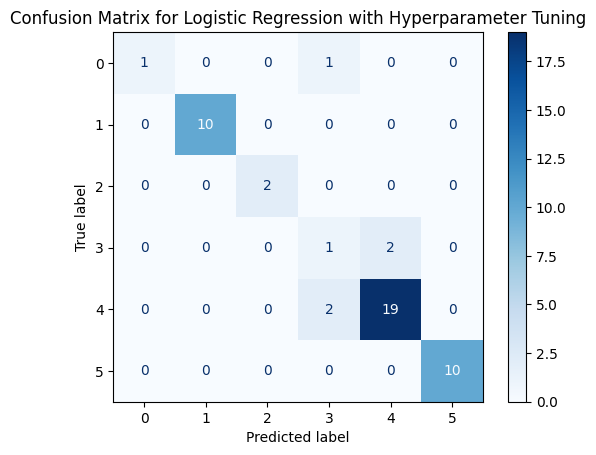

In [ ]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg_hp)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression with Hyperparameter Tuning')
plt.show()

##The idea here is to build a function which can handle dictionary of models and train them, further it can be additionally equipped with hyperparameter tuning.
###1.Supervised Learning model

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200; total time=   0.0

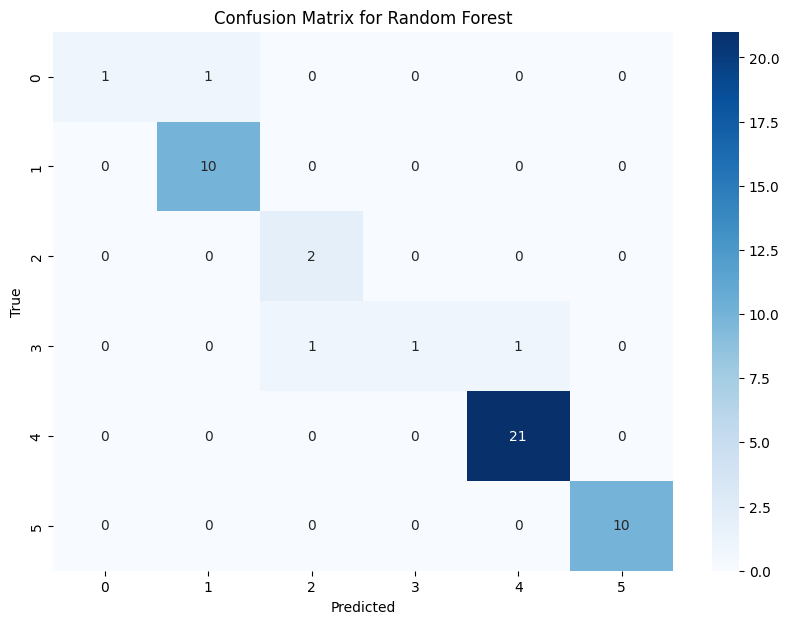

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, 

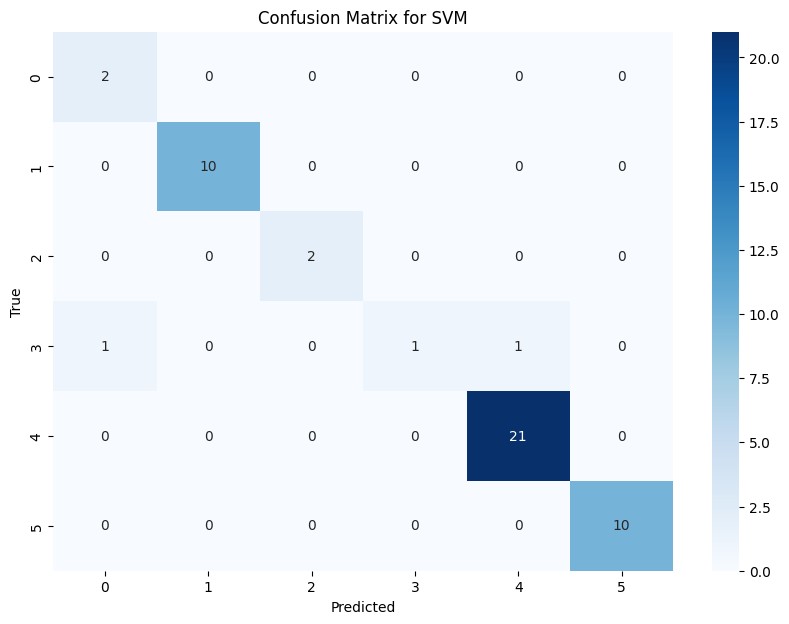

Accuracy (K-Nearest Neighbors): 0.8958333333333334


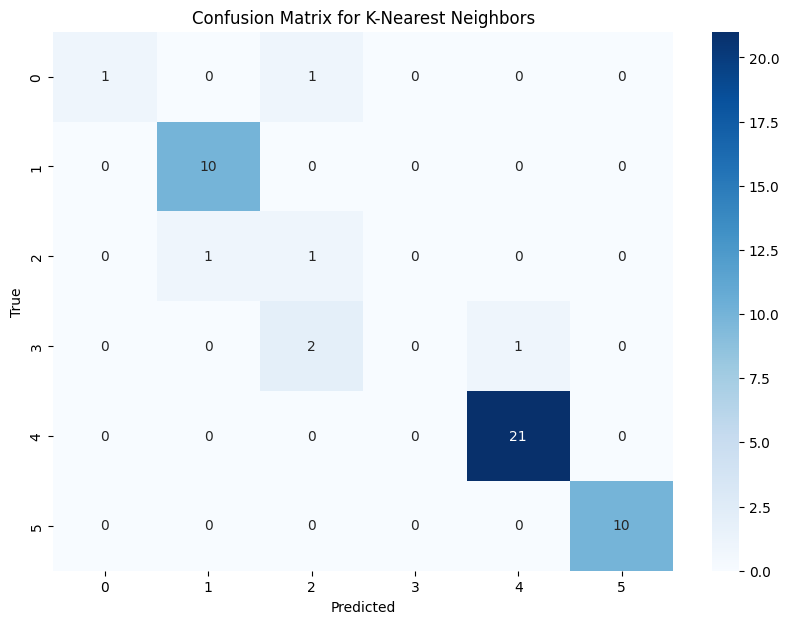

Accuracy (Gradient Boosting): 0.9166666666666666


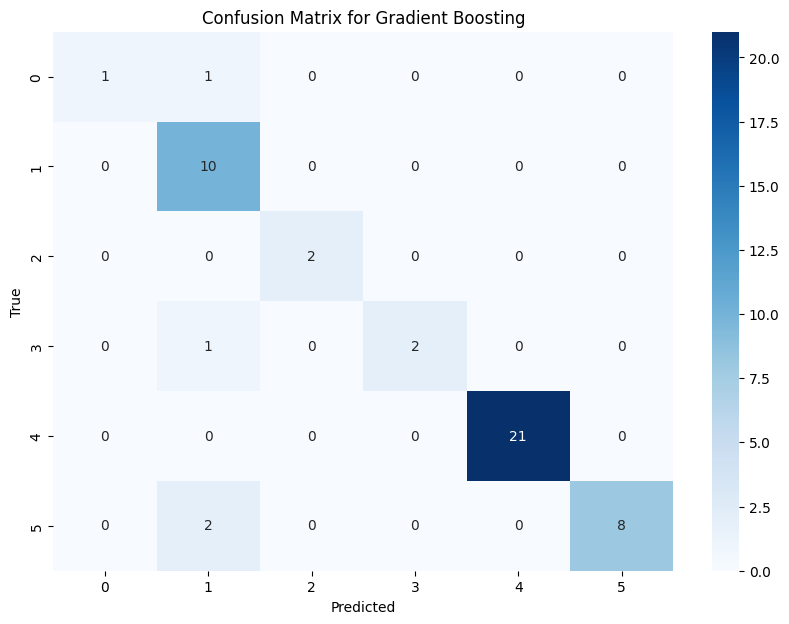

In [ ]:
def train_evaluate_and_plot(models, X_train, X_test, y_train, y_test):
    """
    Train, evaluate, and plot the performance of various machine learning models.

    This function trains multiple machine learning models on the given training data,
    evaluates their performance on the test data, and plots the confusion matrix for each model.
    It also performs hyperparameter tuning for SVM and Random Forest models using GridSearchCV.

    Parameters:
    models (dict): A dictionary where the keys are the names of the machine learning models
                   and the values are the model instances.
    X_train (array-like): The feature training data.
    X_test (array-like): The feature test data.
    y_train (array-like): The target training data.
    y_test (array-like): The target test data.

    Returns:
    dict: A dictionary where the keys are the names of the machine learning models and
          the values are dictionaries containing the accuracy and confusion matrix for each model.
    """
    results = {}
    for method, model in models.items():
        if method == 'SVM':
            # Define the parameter grid for SVM
            param_grid_svm = {
                'C': [0.1, 1, 10, 100],
                'gamma': [1, 0.1, 0.01, 0.001],
                'kernel': ['linear', 'rbf']
            }
            # Use GridSearchCV to find the best hyperparameters
            grid = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=2)
            grid.fit(X_train, y_train)
            model = grid.best_estimator_
            print(f"Best parameters for SVM: {grid.best_params_}")

        if method == 'Random Forest':
            # Define the parameter grid for Random Forest
            param_grid_rf = {
                'n_estimators': [100, 200, 300],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth': [4, 6, 8, 10],
                'criterion': ['gini', 'entropy']
            }
            # Use GridSearchCV to find the best hyperparameters
            grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, refit=True, verbose=2)
            grid.fit(X_train, y_train)
            model = grid.best_estimator_
            print(f"Best parameters for Random Forest: {grid.best_params_}")

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Compute confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Store results
        results[method] = {
            'accuracy': accuracy,
            'confusion_matrix': cm
        }

        # Print accuracy
        print(f"Accuracy ({method}): {accuracy}")

        # Plot confusion matrix
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix for {method}')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

    return results

# Define the models you want to evaluate
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
}

# Get the result
results = train_evaluate_and_plot(models, X_train, X_test, y_train, y_test)

In [ ]:
# Get the unique classes in y_test
unique_classes = sorted(set(y_test))
print(f"Unique classes in y_test: {unique_classes}")
print(f"Number of unique classes: {len(unique_classes)}")


Unique classes in y_test: [0, 1, 2, 4, 5, 6]
Number of unique classes: 6


##Dataframe

In [ ]:
y_encoded = df[target_feature]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)

# Define the feature columns
numeric_features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']
categorical_features = ['Star color']
ordinal_features = ['Star type']

# Encode ordinal feature if it's not numeric
df['Star type'] = df['Star type'].astype(int)

# Setup preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features),
        ('ord', 'passthrough', ordinal_features)
    ])

# Apply preprocessing
X = df[numeric_features + categorical_features + ordinal_features]  # Features only

X_processed = preprocessor.fit_transform(X)

# Check if X_processed is a sparse matrix and convert it to a dense format if it is
if hasattr(X_processed, 'toarray'):
    X_processed = X_processed.toarray()

# Get feature names for categorical data processed by OneHotEncoder
category_enc_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Combine all feature names
all_features = numeric_features + list(category_enc_features) + ordinal_features

# Convert to DataFrame
X_processed_df = pd.DataFrame(X_processed, columns=all_features)

# Display the DataFrame
display(X_processed_df)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color_blue,Star color_blue white,Star color_orange,Star color_orange red,Star color_pale yellow orange,Star color_red,Star color_white,Star color_white yellow,Star color_whitish,Star color_yellow white,Star color_yellowish,Star color_yellowish white,Star type
0,0.029663,2.731275e-09,0.000083,0.876798,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.028980,4.944550e-10,0.000075,0.891807,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.017367,2.590003e-10,0.000048,0.957473,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.022622,1.412729e-10,0.000078,0.893371,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,6.828189e-11,0.000049,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.972150,4.412776e-01,0.695919,0.062226,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
236,0.759307,9.818959e-01,0.612777,0.040338,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
237,0.181025,6.327765e-01,0.730304,0.037211,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
238,0.191692,4.767253e-01,0.570694,0.021576,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0


##K-Means Clustering- Unsupervised learning

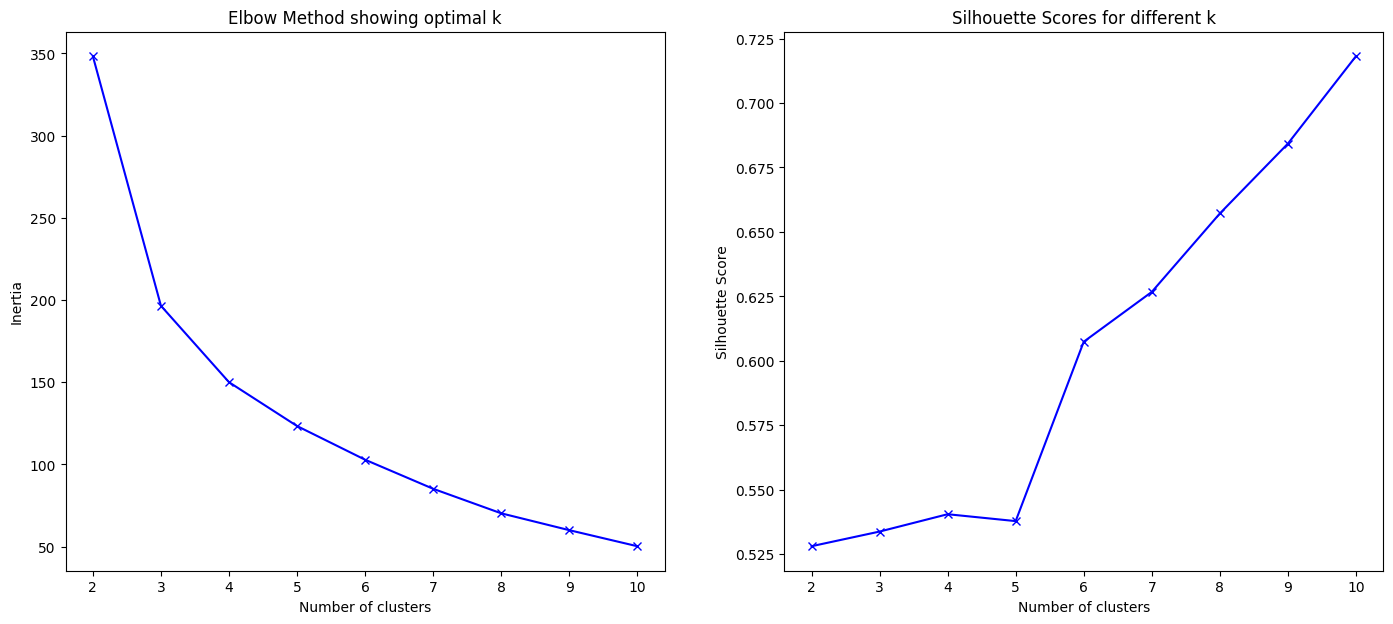

Silhouette Score for 6 clusters: 0.6074336082817047


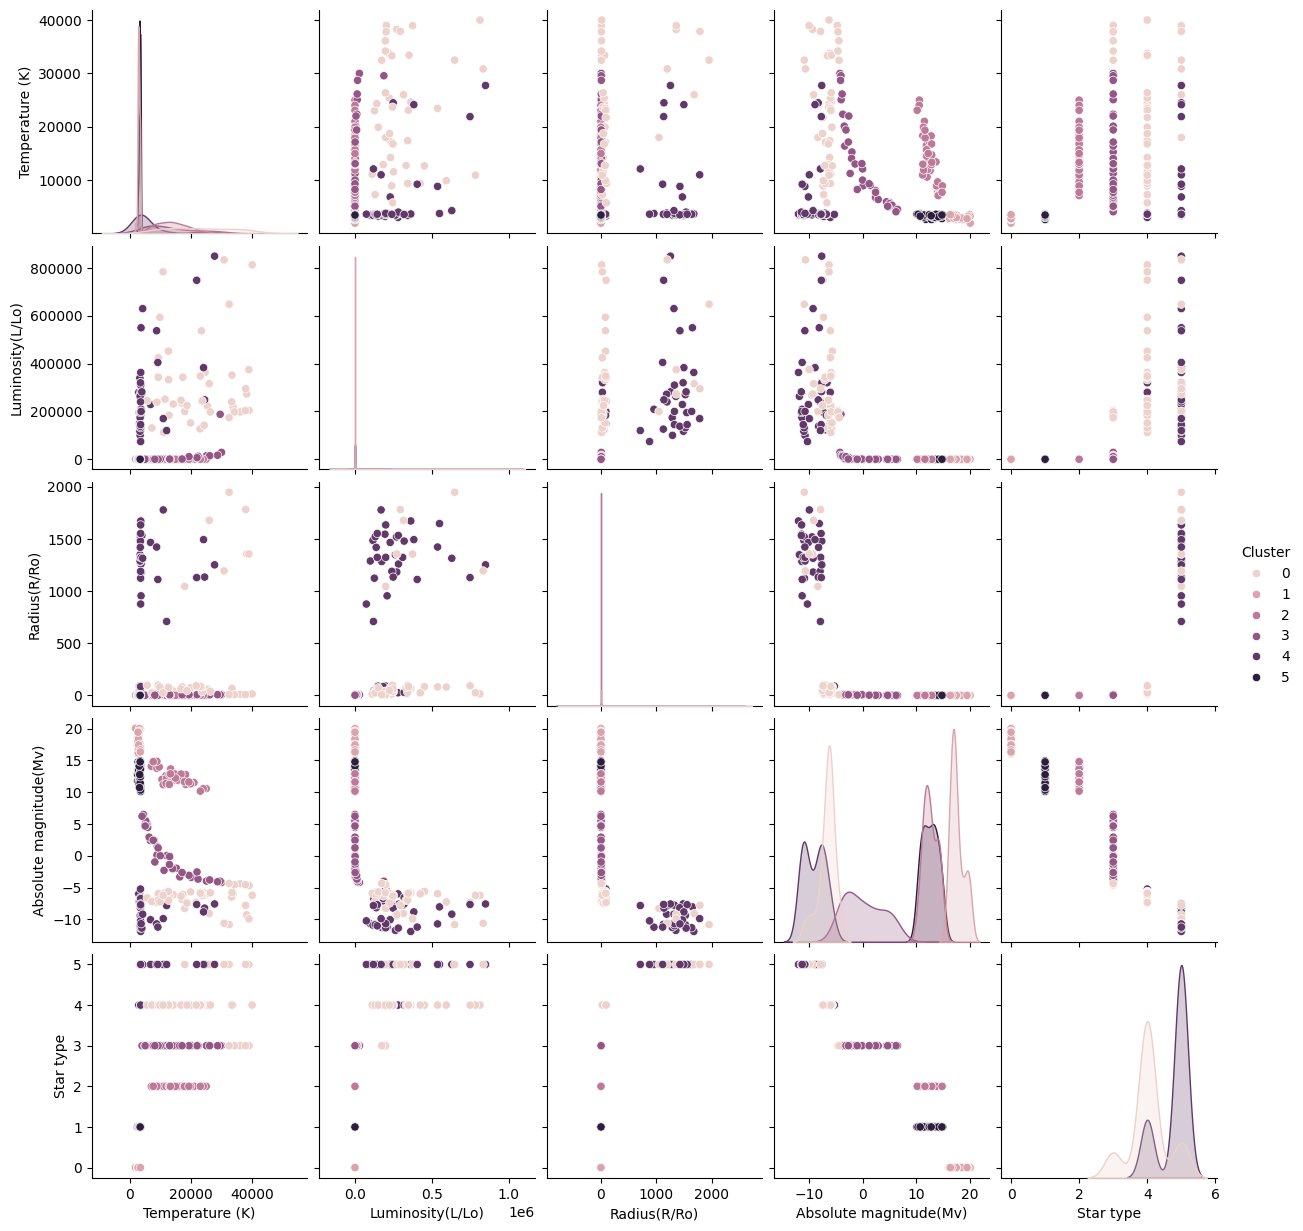

The silhouette score, indicating the quality of the clustering, for 6 clusters is: 0.6074336082817047


In [ ]:
# Determine the optimal number of clusters using the Elbow method and Silhouette scores
inertia = []  # List to store the inertia (sum of squared distances to the nearest cluster center)
silhouette_scores = []  # List to store silhouette scores
K = range(2, 11)  # Let's try cluster sizes from 2 to 10

# Loop through each cluster size and fit KMeans, then calculate inertia and silhouette score
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Initialize KMeans with k clusters
    kmeans.fit(X_processed_df)  # Fit KMeans to the data
    inertia.append(kmeans.inertia_)  # Append the inertia to the list
    silhouette_scores.append(silhouette_score(X_processed_df, kmeans.labels_))  # Append silhouette score

# Plot the results
plt.figure(figsize=(17, 7))

# Plot the inertia to visualize the Elbow method
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method showing optimal k')

# Plot the silhouette scores to determine the optimal number of clusters
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different k')

# Display the plots
plt.show()

# Based on the Elbow method and Silhouette scores, let's choose the optimal number of clusters
optimal_k = 6  # Adjust this based on the plots; it should be the k where the elbow bends or silhouette score is high

# Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
kmeans.fit(X_processed_df)
labels = kmeans.labels_  # Extract cluster labels

# Evaluate the clustering
silhouette_avg = silhouette_score(X_processed_df, labels)  # Calculate the average silhouette score
print(f'Silhouette Score for {optimal_k} clusters: {silhouette_avg}')

# Add the cluster labels to the original data
df['Cluster'] = labels

# Visualize the clusters
sns.pairplot(df, hue='Cluster', vars=numeric_features + ordinal_features)
plt.show()

# Note: Clustering accuracy is not applicable here since we don't have true labels for unsupervised learning
# However, we can print the silhouette score which is a good measure of clustering quality
print(f'The silhouette score, indicating the quality of the clustering, for {optimal_k} clusters is: {silhouette_avg}')

# The silhouette score helps us understand how well-separated the clusters are, with higher scores indicating better-defined clusters.

In [ ]:
# # Compare K-Means Clusters with True Labels
# ari_score = adjusted_rand_score(y, clusters)
# print("Adjusted Rand Index for K-Means:", ari_score)

In [ ]:
# Display the DataFrame
display(X_processed_df)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color_blue,Star color_blue white,Star color_orange,Star color_orange red,Star color_pale yellow orange,Star color_red,Star color_white,Star color_white yellow,Star color_whitish,Star color_yellow white,Star color_yellowish,Star color_yellowish white,Star type
0,0.029663,2.731275e-09,0.000083,0.876798,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.028980,4.944550e-10,0.000075,0.891807,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.017367,2.590003e-10,0.000048,0.957473,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.022622,1.412729e-10,0.000078,0.893371,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,6.828189e-11,0.000049,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.972150,4.412776e-01,0.695919,0.062226,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
236,0.759307,9.818959e-01,0.612777,0.040338,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
237,0.181025,6.327765e-01,0.730304,0.037211,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
238,0.191692,4.767253e-01,0.570694,0.021576,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0


In [ ]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.6 MB/s eta 0:00:00


##Preprocess for MLP model (Just to ensure if the data is ready for MLP)

In [ ]:
# Set random seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

set_seed()

# Check class distribution before encoding
print("Class distribution before encoding:")
print(df['Spectral Class'].value_counts())

# Encode the target variable (Spectral Class) using LabelEncoder
label_encoder = LabelEncoder()
df[target_feature] = label_encoder.fit_transform(df[target_feature])

# Check class distribution after encoding
print("Class distribution after encoding:")
print(df[target_feature].value_counts())

# Setup preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),  # Normalize numerical features
        ('cat', OneHotEncoder(), categorical_features),  # One-hot encode categorical features
        ('ord', 'passthrough', ordinal_features)  # Pass through ordinal features unchanged
    ])

# Separate features and target variable
X = df.drop([target_feature], axis=1)  # Features only
y = df[target_feature]  # Target variable

# Apply preprocessing to the features
X_processed = preprocessor.fit_transform(X)

# Check if X_processed is a sparse matrix and convert it to a dense format if it is
if hasattr(X_processed, 'toarray'):
    X_processed = X_processed.toarray()

# Handle class imbalance using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_processed, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  # Ensure y is a NumPy array
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)  # Ensure y is a NumPy array

# Create PyTorch DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Class distribution before encoding:
Spectral Class
5    111
1     46
6     40
0     19
2     17
4      6
3      1
Name: count, dtype: int64
Class distribution after encoding:
Spectral Class
5    111
1     46
6     40
0     19
2     17
4      6
3      1
Name: count, dtype: int64


##MLP Model:
###1.Base Model
###2.With Hyperparameter tuning
###3.Plot Train - Validation -loss & Accuracy

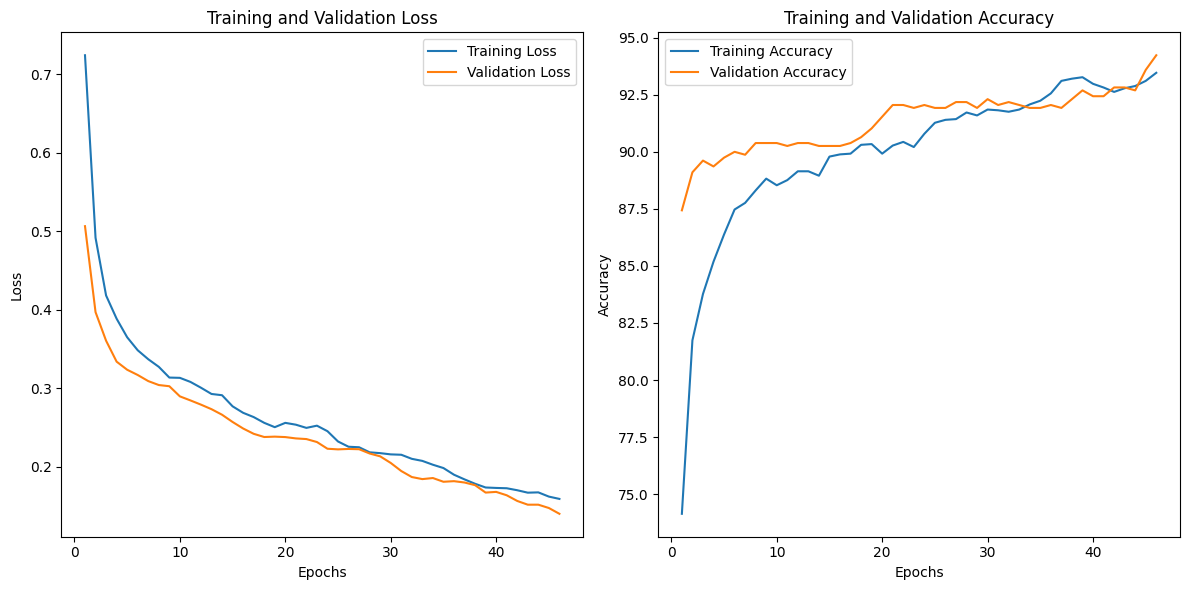

Best Hyperparameters: {'hidden_size': 128, 'learning_rate': 0.01}
Final Model Accuracy on Validation Set: 96.79%


In [ ]:
class MLP(nn.Module):
    """
    A simple Multi-Layer Perceptron (MLP) model with dropout for regularization.
    """

    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out


# Determine input size and number of classes for the model
input_size = X_train_tensor.shape[1]
num_classes = len(label_encoder.classes_)


def train_model(hidden_size, learning_rate, num_epochs=50):
    """
    Train the MLP model with the given hyperparameters.

    Parameters:
    hidden_size (int): Number of neurons in the hidden layer.
    learning_rate (float): Learning rate for the optimizer.
    num_epochs (int): Number of training epochs.

    Returns:
    model (MLP): Trained MLP model.
    train_losses (list): List of training losses per epoch.
    val_losses (list): List of validation losses per epoch.
    train_accuracies (list): List of training accuracies per epoch.
    val_accuracies (list): List of validation accuracies per epoch.
    """
    # Initialize the model, loss function, and optimizer
    model = MLP(input_size, hidden_size, num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Lists to store training and validation metrics
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    # Training loop
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(100 * correct / total)

        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0

        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += y_batch.size(0)
                correct += (predicted == y_batch).sum().item()

        val_losses.append(val_loss / len(test_loader))
        val_accuracies.append(100 * correct / total)

    return model, train_losses, val_losses, train_accuracies, val_accuracies


def moving_average(values, window):
    """
    Apply a moving average to the given values.

    Parameters:
    values (list or array): List or array of values to smooth.
    window (int): Window size for the moving average.

    Returns:
    array: Smoothed values.
    """
    weights = np.repeat(1.0, window) / window
    sma = np.convolve(values, weights, 'valid')
    return sma


# Hyperparameter tuning parameters
hidden_sizes = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]
best_accuracy = 0
best_params = {}
best_model = None

# Grid search for hyperparameter tuning
for hidden_size in hidden_sizes:
    for lr in learning_rates:
        set_seed()  # Ensure reproducibility
        model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(hidden_size, lr)
        if max(val_accuracies) > best_accuracy:
            best_accuracy = max(val_accuracies)
            best_params = {'hidden_size': hidden_size, 'learning_rate': lr}
            best_model = model
            best_train_losses = train_losses
            best_val_losses = val_losses
            best_train_accuracies = train_accuracies
            best_val_accuracies = val_accuracies

# Apply moving average for smoothing training and validation metrics
window_size = 5
smoothed_train_losses = moving_average(best_train_losses, window_size)
smoothed_val_losses = moving_average(best_val_losses, window_size)
smoothed_train_accuracies = moving_average(best_train_accuracies, window_size)
smoothed_val_accuracies = moving_average(best_val_accuracies, window_size)

# Plot training and validation loss and accuracy
epochs = range(1, len(smoothed_train_losses) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, smoothed_train_losses, label='Training Loss')
plt.plot(epochs, smoothed_val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, smoothed_train_accuracies, label='Training Accuracy')
plt.plot(epochs, smoothed_val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Print best hyperparameters and final accuracy
final_accuracy = best_accuracy
print(f'Best Hyperparameters: {best_params}')
print(f'Final Model Accuracy on Validation Set: {final_accuracy:.2f}%')

##Model Accuracy on Test dataset and Confusion matrix

Final Model Accuracy on Test Set: 95.51%


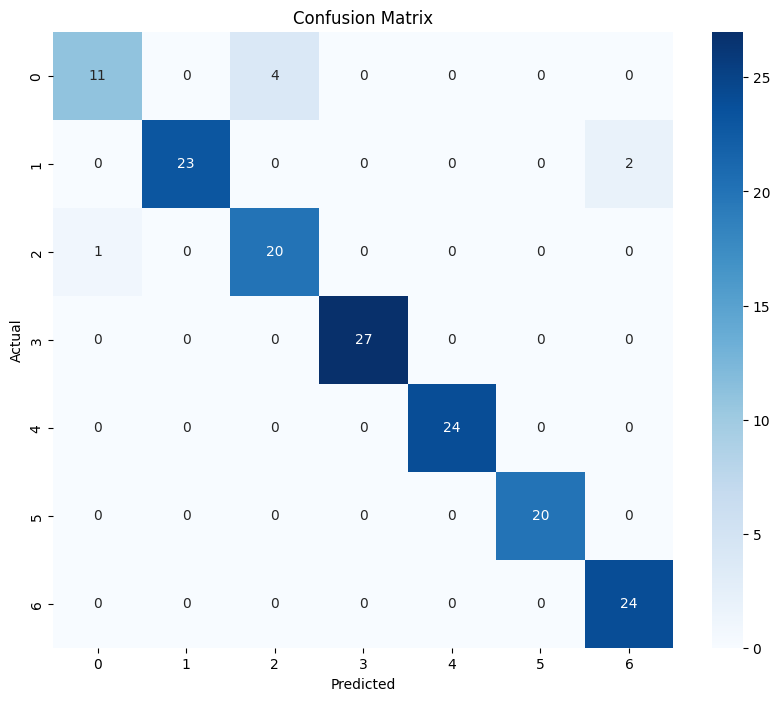

In [ ]:
# Evaluate the best model on the test set and plot the confusion matrix
best_model.eval()
correct = 0
total = 0
all_predictions = []
all_targets = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = best_model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        all_predictions.extend(predicted.cpu().numpy())
        all_targets.extend(y_batch.cpu().numpy())

final_accuracy = 100 * correct / total
print(f'Final Model Accuracy on Test Set: {final_accuracy:.2f}%')

# Plot the confusion matrix
conf_matrix = confusion_matrix(all_targets, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Preprocess for CNN model (Just to ensure if the data is ready for CNN)

In [ ]:
# Set random seeds for reproducibility
# def set_seed(seed=42):
#     random.seed(seed)
#     np.random.seed(seed)
#     torch.manual_seed(seed)
#     if torch.cuda.is_available():
#         torch.cuda.manual_seed(seed)
#         torch.cuda.manual_seed_all(seed)
#         torch.backends.cudnn.deterministic = True
#         torch.backends.cudnn.benchmark = False

# set_seed()

# Check class distribution before encoding
print("Class distribution before encoding:")
print(df['Spectral Class'].value_counts())

# Encode the target variable (Spectral Class) using LabelEncoder
label_encoder = LabelEncoder()
df[target_feature] = label_encoder.fit_transform(df[target_feature])

# Check class distribution after encoding
print("Class distribution after encoding:")
print(df[target_feature].value_counts())

# Setup preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),  # Normalize numerical features
        ('cat', OneHotEncoder(), categorical_features),  # One-hot encode categorical features
        ('ord', 'passthrough', ordinal_features)  # Pass through ordinal features unchanged
    ])

# Separate features and target variable
X = df.drop([target_feature], axis=1)  # Features only
y = df[target_feature]  # Target variable

# Apply preprocessing to the features
X_processed = preprocessor.fit_transform(X)

# Check if X_processed is a sparse matrix and convert it to a dense format if it is
if hasattr(X_processed, 'toarray'):
    X_processed = X_processed.toarray()

# Handle class imbalance using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_processed, y)

# Split the resampled data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape data for CNN (assuming we can treat the features as a 1D "image" with 1 channel)
X_train_cnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_cnn = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_cnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_cnn, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val_cnn, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_cnn, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Class distribution before encoding:
Spectral Class
5    111
1     46
6     40
0     19
2     17
4      6
3      1
Name: count, dtype: int64
Class distribution after encoding:
Spectral Class
5    111
1     46
6     40
0     19
2     17
4      6
3      1
Name: count, dtype: int64


##CNN Model:
###1.Base Model
###2.With Hyperparameter tuning
###3.Plot Train - Validation -loss & Accuracy

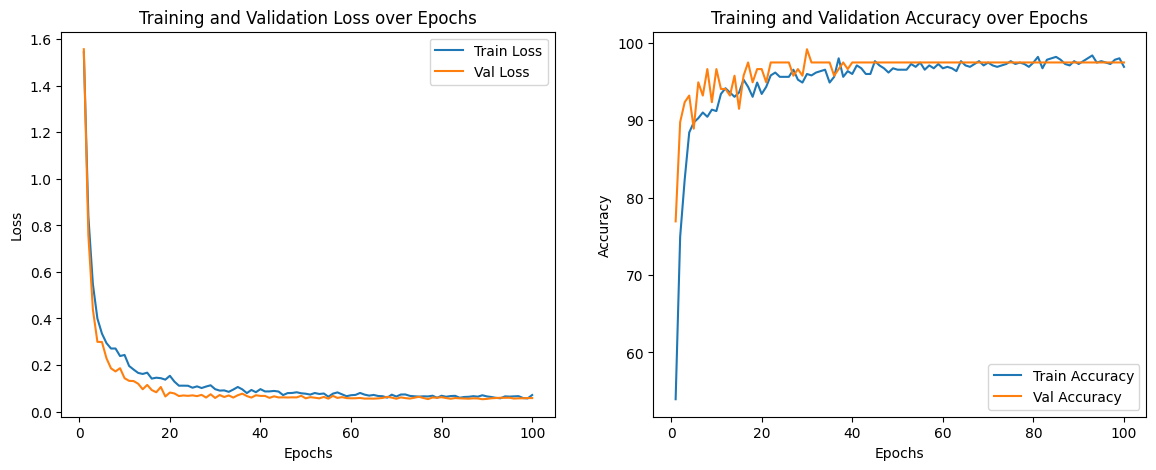

Best Hyperparameters: {'kernel_size': 3, 'learning_rate': 0.001, 'dropout_rate': 0.3}
Final Model Accuracy on Validation Set: 97.44%


In [ ]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self, input_size, num_classes, dropout_rate=0.5):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm1d(32)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc1_input_size = (input_size // 4) * 64
        self.fc1 = nn.Linear(self.fc1_input_size, 128)
        self.dropout = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool1d(kernel_size=2, stride=2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Define input size and number of classes
input_size = X_train_cnn.shape[2]
num_classes = len(label_encoder.classes_)

# Hyperparameter tuning using Grid Search
def train_model(kernel_size, learning_rate, dropout_rate, num_epochs=100):
    """
    Train the CNN model with the specified hyperparameters and return performance metrics.

    Parameters:
    kernel_size (int): The size of the kernel for convolution layers.
    learning_rate (float): The learning rate for the optimizer.
    dropout_rate (float): The dropout rate for regularization.
    num_epochs (int): The number of epochs for training.

    Returns:
    tuple: Containing lists of training and validation losses and accuracies.
    """
    model = CNN(input_size, num_classes, dropout_rate)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += y_batch.size(0)
            correct_train += (predicted == y_batch).sum().item()

        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(100 * correct_train / total_train)

        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                total_val += y_batch.size(0)
                correct_val += (predicted == y_batch).sum().item()

        val_losses.append(val_loss / len(val_loader))
        val_accuracies.append(100 * correct_val / total_val)
        scheduler.step()

    return train_losses, val_losses, train_accuracies, val_accuracies

# Hyperparameter search space
kernel_sizes = [3, 5]
learning_rates = [0.001, 0.01, 0.1]
dropout_rates = [0.3, 0.5, 0.7]
best_accuracy = 0
best_params = {}
best_train_losses = []
best_val_losses = []
best_train_accuracies = []
best_val_accuracies = []

# Hyperparameter tuning
for kernel_size in kernel_sizes:
    for lr in learning_rates:
        for dr in dropout_rates:
            set_seed()
            train_losses, val_losses, train_accuracies, val_accuracies = train_model(kernel_size, lr, dr)
            final_val_accuracy = val_accuracies[-1]
            if final_val_accuracy > best_accuracy:
                best_accuracy = final_val_accuracy
                best_params = {'kernel_size': kernel_size, 'learning_rate': lr, 'dropout_rate': dr}
                best_train_losses = train_losses
                best_val_losses = val_losses
                best_train_accuracies = train_accuracies
                best_val_accuracies = val_accuracies

# Train the best model
best_kernel_size = best_params['kernel_size']
best_learning_rate = best_params['learning_rate']
best_dropout_rate = best_params['dropout_rate']
best_model = CNN(input_size, num_classes, best_dropout_rate)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(best_model.parameters(), lr=best_learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)
num_epochs = 100

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    best_model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = best_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += y_batch.size(0)
        correct_train += (predicted == y_batch).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)

    best_model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = best_model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_val += y_batch.size(0)
            correct_val += (predicted == y_batch).sum().item()

    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)
    scheduler.step()

# Plot accuracy and loss over epochs
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.legend()

plt.show()

# Print best hyperparameters and final accuracy
final_accuracy = best_accuracy
print(f'Best Hyperparameters: {best_params}')
print(f'Final Model Accuracy on Validation Set: {final_accuracy:.2f}%')

##Model Accuracy on Test dataset and Confusion matrix

Best Hyperparameters: {'kernel_size': 3, 'learning_rate': 0.001, 'dropout_rate': 0.3}
Final Model Accuracy on Test Set: 95.73%


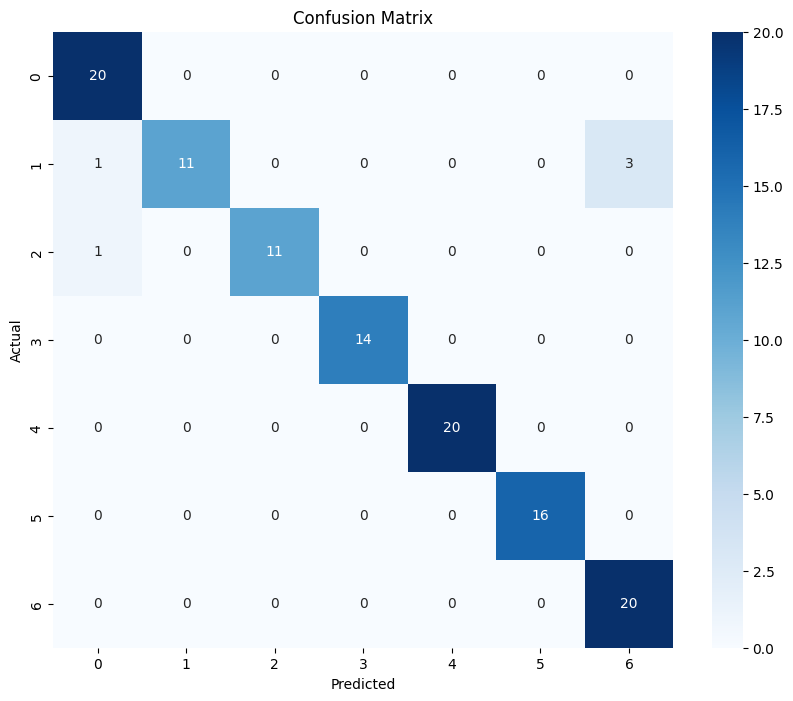

In [ ]:
# Final accuracy on test set
best_model.eval()
correct = 0
total = 0
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = best_model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

final_accuracy = 100 * correct / total
print(f'Best Hyperparameters: {best_params}')
print(f'Final Model Accuracy on Test Set: {final_accuracy:.2f}%')
# Final accuracy on test set
best_model.eval()
correct = 0
total = 0
all_predictions = []
all_targets = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = best_model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
        all_predictions.extend(predicted.cpu().numpy())
        all_targets.extend(y_batch.cpu().numpy())



# Plot the confusion matrix
conf_matrix = confusion_matrix(all_targets, all_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##Save the model for transfer learning

In [ ]:
# Save the model
# model_path = 'cnn_model.pth'
# torch.save(best_model.state_dict(), model_path)
# print(f'Model saved to {model_path}')

# # Download the saved model
# files.download(model_path)

# # Create sample test data
# sample_data = np.array([X_test[0]])  # Take the first test sample for example
# sample_tensor = torch.tensor(sample_data, dtype=torch.float32).reshape(1, 1, -1)

# # Load the saved model for prediction
# loaded_model = CNN(input_size, num_classes, best_dropout_rate)
# loaded_model.load_state_dict(torch.load(model_path))
# loaded_model.eval()

# # Make prediction on sample test data
# with torch.no_grad():
#     sample_output = loaded_model(sample_tensor)
#     _, sample_predicted = torch.max(sample_output.data, 1)

# # Decode the prediction to the original class label
# predicted_class = label_encoder.inverse_transform(sample_predicted.cpu().numpy())
# print(f'Predicted class for the sample test data: {predicted_class[0]}')